# Spam Detection Using the SMS Spam Dataset

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
warnings.filterwarnings("ignore")
%matplotlib inline

## Reading The Data

In [2]:
filename = './smsspamcollection/SMSSpamCollection.txt'
texts = []
labels = []

f = open(filename, 'r')
for line in f.readlines():
    fields = line.split('\t')
    labels.append(fields[0])
    texts.append(fields[1])

f.close()

data = pd.DataFrame({'text': texts, 'label': labels})
data.head(10)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...\n
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
label    5574 non-null object
text     5574 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


## Exploratory Data Analysis

### Distribution of Ham And Spam Messages

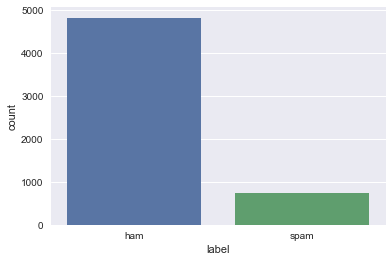

In [4]:
sns.countplot(data['label'])

### Length of Messages

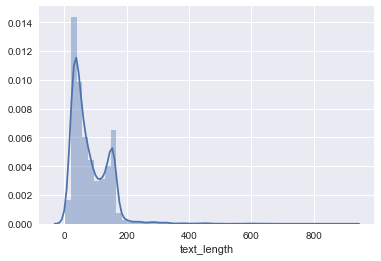

In [5]:
data['text_length'] = data['text'].apply(lambda x: len(x))
sns.distplot(data['text_length'])

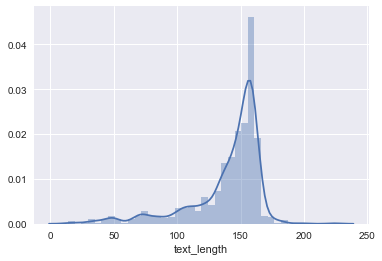

In [6]:
sns.distplot(data[data['label'] == 'spam']['text_length'])

In [7]:
data[data['label'] == 'spam']['text_length'].describe()

count    747.000000
mean     139.676037
std       28.871250
min       14.000000
25%      134.000000
50%      150.000000
75%      158.000000
max      224.000000
Name: text_length, dtype: float64

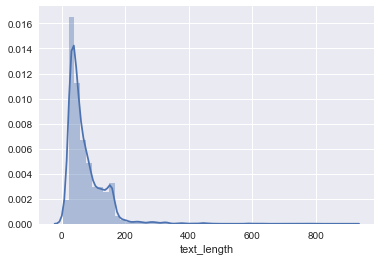

In [8]:
sns.distplot(data[data['label'] == 'ham']['text_length'])

In [9]:
data[data['label'] == 'ham']['text_length'].describe()

count    4827.000000
mean       72.471929
std        58.326643
min         3.000000
25%        34.000000
50%        53.000000
75%        94.000000
max       911.000000
Name: text_length, dtype: float64

## Defining Text Preprocessing Functions

In [10]:
import re # regex library
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text) # Effectively removes HTML markup tags
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
    return text

## Splitting the Data Into Training and Testing Sets

In [11]:
from sklearn.model_selection import train_test_split
X = data['text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training Models Using a Pipeline

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, max_features=700, preprocessor=preprocessor, ngram_range=(1,1))

### Naive Bayes

In [13]:
from sklearn.naive_bayes import MultinomialNB

start = time.time()
naive_bayes_pipeline = Pipeline([('vectorizer', tfidf), ('nb', MultinomialNB())])
naive_bayes_pipeline.fit(X_train, y_train)
end = time.time()
print('Time taken to train model: {} seconds'.format(end - start))

Time taken to train model: 0.12819194793701172 seconds


In [14]:
y_pred = naive_bayes_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy: {} %'.format(100 * accuracy_score(y_test, y_pred)))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      1447
       spam       0.98      0.85      0.91       226

avg / total       0.98      0.98      0.98      1673

Accuracy: 97.7884040645547 %


### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
start = time.time()
lr_pipeline = Pipeline([('vectorizer', tfidf), ('lr', LogisticRegression())])
lr_pipeline.fit(X_train, y_train)
end = time.time()
print('Time taken to train model: {} seconds'.format(end - start))

Time taken to train model: 0.16974997520446777 seconds


In [16]:
y_pred = lr_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy: {} %'.format(100 * accuracy_score(y_test, y_pred)))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      1447
       spam       0.97      0.85      0.91       226

avg / total       0.98      0.98      0.98      1673

Accuracy: 97.66885833831441 %


### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()
dtree_pipeline = Pipeline([('vectorizer', tfidf), ('dtree', DecisionTreeClassifier())])
dtree_pipeline.fit(X_train, y_train)
end = time.time()
print('Time taken to train model: {} seconds'.format(end - start))

Time taken to train model: 0.3124730587005615 seconds


In [18]:
y_pred = dtree_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy: {} %'.format(100 * accuracy_score(y_test, y_pred)))

             precision    recall  f1-score   support

        ham       0.98      0.99      0.98      1447
       spam       0.91      0.87      0.89       226

avg / total       0.97      0.97      0.97      1673

Accuracy: 97.01135684399283 %


### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
rf_pipeline = Pipeline([('vectorizer', tfidf), ('svm', RandomForestClassifier(n_estimators=200, n_jobs=-1))])
rf_pipeline.fit(X_train, y_train)
end = time.time()
print('Time taken to train model: {} seconds'.format(end - start))

//anaconda/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Time taken to train model: 0.5800487995147705 seconds


In [20]:
y_pred = rf_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy: {} %'.format(100 * accuracy_score(y_test, y_pred)))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      1447
       spam       0.99      0.88      0.93       226

avg / total       0.98      0.98      0.98      1673

Accuracy: 98.2068141063957 %


### Gradient Boosting

In [21]:
from xgboost import XGBClassifier
start = time.time()
xgb_pipeline = Pipeline([('vectorizer', tfidf), ('xgboost', XGBClassifier(n_estimators=400))])
xgb_pipeline.fit(X_train, y_train)
end = time.time()
print('Time taken to train model: {} seconds'.format(end - start))

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Time taken to train model: 1.31772780418396 seconds


In [22]:
y_pred = xgb_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy: {} %'.format(100 * accuracy_score(y_test, y_pred)))

             precision    recall  f1-score   support

        ham       0.98      0.99      0.99      1447
       spam       0.96      0.88      0.92       226

avg / total       0.98      0.98      0.98      1673

Accuracy: 97.90794979079497 %


//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Neural Network

In [23]:
from sklearn.neural_network import MLPClassifier
start = time.time()
neural_net_pipeline = Pipeline([('vectorizer', tfidf), ('xgboost', MLPClassifier(hidden_layer_sizes=(700, 700)))])
neural_net_pipeline.fit(X_train, y_train)
end = time.time()
print('Time taken to train model: {} seconds'.format(end - start))

Time taken to train model: 7.1320579051971436 seconds


In [24]:
y_pred = neural_net_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy: {} %'.format(100 * accuracy_score(y_test, y_pred)))

             precision    recall  f1-score   support

        ham       0.99      0.99      0.99      1447
       spam       0.94      0.92      0.93       226

avg / total       0.98      0.98      0.98      1673

Accuracy: 98.08726838015541 %


## Evaluating Models with K-Fold Cross-Validation

In [25]:
from sklearn.model_selection import cross_val_score

def average(values):
    
    return sum(values) / len(values)

naive_bayes_pipeline = Pipeline([('vectorizer', tfidf), ('nb', MultinomialNB())])
lr_pipeline = Pipeline([('vectorizer', tfidf), ('lr', LogisticRegression())])
dtree_pipeline = Pipeline([('vectorizer', tfidf), ('dtree', DecisionTreeClassifier())])
rf_pipeline = Pipeline([('vectorizer', tfidf), ('svm', RandomForestClassifier(n_estimators=200, n_jobs=-1))])
xgb_pipeline = Pipeline([('vectorizer', tfidf), ('xgboost', XGBClassifier(n_estimators=400))])
neural_net_pipeline = Pipeline([('vectorizer', tfidf), ('xgboost', MLPClassifier(hidden_layer_sizes=(700, 700)))])

model_dict = {'naive bayes': naive_bayes_pipeline,
              'logistic regression': lr_pipeline,
              'decision tree': dtree_pipeline,
              'random forest': rf_pipeline,
              'gradient boosting': xgb_pipeline,
              'neural network': neural_net_pipeline}

scores = defaultdict()

for model_name, model in model_dict.items():
    
    cross_val_scores = cross_val_score(model, X, y, cv=3)
    scores[model_name] = average(cross_val_scores)

for model_name, score in scores.items():
    
    print('{0}: Cross validation accuracy = {1}'.format(model_name, score))

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


logistic regression: Cross validation accuracy = 0.9736275565123789
naive bayes: Cross validation accuracy = 0.9750627915321134
gradient boosting: Cross validation accuracy = 0.9773950484391819
decision tree: Cross validation accuracy = 0.9632221026193039
neural network: Cross validation accuracy = 0.9838536060279871
random forest: Cross validation accuracy = 0.9799067097237172


## Results Summary

| Model | 3-Fold CV Accuracy (%) | Training Time (s) |
| --- | --- | --- |
| Naive Bayes | 97.51 | 0.12 |
| Logistic Regression | 97.36 | 0.17 |
| Decision Tree | 96.32 | 0.31 |
| Random Forest | 98.00 | 0.57 |
| Gradient Boosting | 97.74 | 1.33 |
| Neural Network | 98.39 | 7.13 |